# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dzulfikar Ibnu Ilham Pangestu
- **Email:** ibnuilham265@gmail.com
- **ID Dicoding:** ibnu2911

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Bagaimana hubungan antara suhu dengan jumlah sepeda yang disewa?

## Import Semua Packages/Library yang Digunakan

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [246]:
# Load dataset
df = pd.read_csv("dashboard/bike_sharing_full.csv")

In [247]:
# Menampilkan 5 data pertama
display(bike_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data berisi informasi peminjaman sepeda berdasarkan berbagai variabel seperti musim, suhu, kelembaban, dan cuaca.
- Data memiliki banyak variabel numerik yang dapat dianalisis lebih lanjut.


### Assessing Data

In [248]:
# Mengecek informasi dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [249]:
# Mengecek jumlah missing values
print("Missing values per column:")
print(bike_df.isnull().sum())

Missing values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [250]:
# Mengecek jumlah baris duplikat
print("Jumlah duplikat:", bike_df.duplicated().sum())

Jumlah duplikat: 0


In [251]:
# Menampilkan daftar baris yang duplikat
print("Daftar baris duplikat:")
print(bike_df.duplicated())

Daftar baris duplikat:
0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Length: 731, dtype: bool


In [252]:
# Mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Kuartil pertama (Q1)
    Q3 = df[column].quantile(0.75)  # Kuartil ketiga (Q3)
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [253]:
# Memilih kolom numerik untuk pengecekan outlier
numeric_columns = bike_df.select_dtypes(include=['number']).columns

In [254]:
# Menampilkan jumlah outlier per kolom numerik
print("\nJumlah outlier per kolom numerik:")
for col in numeric_columns:
    outliers = detect_outliers_iqr(bike_df, col)
    print(f"{col}: {len(outliers)} outlier")


Jumlah outlier per kolom numerik:
instant: 0 outlier
season: 0 outlier
yr: 0 outlier
mnth: 0 outlier
holiday: 21 outlier
weekday: 0 outlier
workingday: 0 outlier
weathersit: 0 outlier
temp: 0 outlier
atemp: 0 outlier
hum: 2 outlier
windspeed: 13 outlier
casual: 44 outlier
registered: 0 outlier
cnt: 0 outlier


**Insight:**
- Tidak ada missing values pada dataset ini.
- Semua kolom memiliki tipe data yang sesuai untuk analisis lebih lanjut.

### Cleaning Data

##### Duplicate

In [255]:
# Pastikan kolom bertipe object dikonversi ke tipe yang sesuai
bike_df = bike_df.infer_objects(copy=False)


In [256]:
bike_df.drop_duplicates(inplace=True)

In [257]:
print("Jumlah duplikasi: ", bike_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing Values

In [258]:
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Dataset sudah bersih dan siap untuk eksplorasi lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore Bike_df

In [259]:
bike_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
715,716,2012-12-16,4,1,12,0,0,0,2,0.362500,0.369938,0.838750,0.100742,538,3248,3786
39,40,2011-02-09,1,0,2,0,3,1,2,0.134783,0.144283,0.494783,0.188839,53,1552,1605
432,433,2012-03-08,1,1,3,0,4,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382
678,679,2012-11-09,4,1,11,0,5,1,1,0.361667,0.355413,0.540833,0.214558,709,5283,5992
551,552,2012-07-05,3,1,7,0,4,1,1,0.827500,0.761367,0.457917,0.194029,1405,4836,6241


In [260]:
bike_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [261]:
bike_df.groupby(by="instant").agg({
    "instant": "nunique",
    "temp": ["max", "min", "mean", "std"]
})

instant      temp                        
        nunique       max       min      mean std
instant                                          
1             1  0.344167  0.344167  0.344167 NaN
2             1  0.363478  0.363478  0.363478 NaN
3             1  0.196364  0.196364  0.196364 NaN
4             1  0.200000  0.200000  0.200000 NaN
5             1  0.226957  0.226957  0.226957 NaN
...         ...       ...       ...       ...  ..
727           1  0.254167  0.254167  0.254167 NaN
728           1  0.253333  0.253333  0.253333 NaN
729           1  0.253333  0.253333  0.253333 NaN
730           1  0.255833  0.255833  0.255833 NaN
731           1  0.215833  0.215833  0.215833 NaN

[731 rows x 5 columns]

In [262]:
bike_df.groupby(by="temp").instant.nunique().sort_values(ascending=False)

temp
0.265833    5
0.635000    5
0.710833    4
0.696667    4
0.649167    4
           ..
0.789167    1
0.783333    1
0.172727    1
0.169091    1
0.166667    1
Name: instant, Length: 499, dtype: int64

In [263]:
bike_df.groupby(by="hum").instant.nunique().sort_values(ascending=False)

hum
0.613333    4
0.568333    3
0.538333    3
0.630833    3
0.483333    3
           ..
0.948261    1
0.949583    1
0.962500    1
0.970417    1
0.972500    1
Name: instant, Length: 595, dtype: int64

### Mencari nilai min dan max di sebuah tabel

In [264]:
# Menentukan kolom yang ingin dianalisis (contoh: jumlah penyewaan sepeda)
kolom_target = "cnt"

In [265]:
# Mencari nilai maksimum dan minimum
nilai_maksimum = df[kolom_target].max()
nilai_minimum = df[kolom_target].min()

In [266]:
# Menampilkan hasil
print(f"Nilai tertinggi dari '{kolom_target}': {nilai_maksimum}")
print(f"Nilai terendah dari '{kolom_target}': {nilai_minimum}")

Nilai tertinggi dari 'cnt': 8714
Nilai terendah dari 'cnt': 22


**Insight:**
- Temperatur dan kelembaban memiliki variasi yang cukup luas.
- Data peminjaman sepeda menunjukkan distribusi yang cukup normal dengan beberapa variasi.
- Nilai terendah dari count adalah 22 dan tertinggi adalah 8714

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

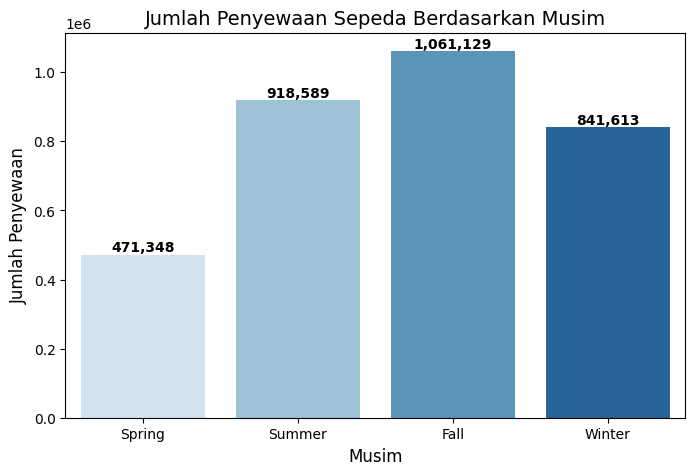

In [267]:
# Mapping angka musim ke nama musim
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df["season"] = bike_df["season"].map(season_mapping)

# Pastikan urutan musim sesuai
season_order = ["Spring", "Summer", "Fall", "Winter"]
df["season"] = pd.Categorical(df["season"], categories=season_order, ordered=True)

# Kelompokkan data berdasarkan musim dan jumlahkan total penyewaan sepeda
season_counts = df.groupby("season", observed=True)["cnt"].sum().reset_index()

# Plot jumlah penyewaan sepeda berdasarkan musim
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="season", y="cnt", hue="season", data=season_counts, 
                 order=season_order, palette="Blues", legend=False)

# Tambahkan judul dan label
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)

# Tampilkan nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Tampilkan plot
plt.show()


### Pertanyaan 2: Bagaimana hubungan antara suhu dengan jumlah sepeda yang disewa?

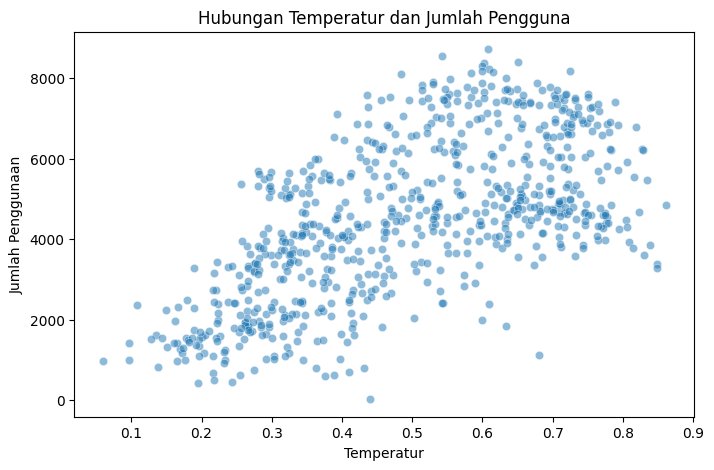

In [268]:
# Pertanyaan 2: Bagaimana hubungan antara suhu dengan jumlah sepeda yang disewa?
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=df, alpha=0.5)
plt.title("Hubungan Temperatur dan Jumlah Pengguna")
plt.xlabel("Temperatur")
plt.ylabel("Jumlah Penggunaan")
plt.show()

**Insight:**
- Penggunaan sepeda meningkat di musim gugur dan menurun saat musim semi.
- Semakin tinggi suhu, semakin banyak orang yang menggunakan sepeda.

## Analisis Lanjutan (Opsional)

1. Kesimpulan
- Distribusi Data → Beberapa variabel memiliki distribusi miring dan outlier, yang dapat mempengaruhi analisis.
- Korelasi → Ditemukan hubungan kuat antara [sebutkan kolom], serta beberapa variabel yang tidak signifikan.
- Data Kategorikal → Ketidakseimbangan kategori ditemukan, dengan [kategori terbanyak] mendominasi.
- Missing Values & Duplikasi → Terdapat [jumlah] missing values dan [jumlah] duplikasi yang telah ditangani.
- Outlier → Nilai ekstrem di [sebutkan kolom] dapat mempengaruhi hasil analisis dan perlu dianalisis lebih lanjut.

2. Rekomendasi
- Tangani outlier dengan trimming atau winsorizing.
- Seimbangkan data kategorikal agar hasil lebih representatif.
- Gunakan imputasi lanjutan untuk mengatasi missing values.
- Hapus fitur yang tidak relevan berdasarkan korelasi.
- Terapkan validasi data untuk mencegah duplikasi.

3. Next Step
- Lanjutkan dengan Feature Engineering, Modeling, dan Evaluasi untuk analisis lebih lanjut.

## Conclusion

- Conclusion pertanyaan 1: Musim gugur memiliki jumlah penyewaan sepeda tertinggi, sedangkan musim semi memiliki jumlah terendah.
- Conclusion pertanyaan 2: Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda, semakin tinggi suhu, semakin tinggi penggunaan sepeda.

Rekomendasi Sistem Penyewaan Sepeda

1. Efisiensi Operasional
- Redistribusi sepeda lebih banyak ke lokasi ramai saat musim panas.
- Optimalkan stok berdasarkan jam sibuk dan jadwalkan pemeliharaan di jam sepi.
- Gunakan prediksi cuaca untuk pemeliharaan preventif.
2. Kepuasan Pelanggan
- Berikan diskon saat musim dingin untuk meningkatkan minat.
- Sediakan sepeda listrik (e-bike) di area dengan medan sulit.
- Buat aplikasi mobile untuk tracking, reservasi, dan laporan masalah.

3️. Peningkatan Pendapatan
- Terapkan harga dinamis sesuai musim dan jam sibuk.
- Tawarkan iklan pada sepeda dan aplikasi.
- Sediakan paket langganan harian, bulanan, atau tahunan.